In [1]:
import sys
sys.path.append('../')
sys.path.append('../scripts')
import os
import pandas as pd
from scripts.data_handler import get_data
from transformers import AutoTokenizer,DistilBertForSequenceClassification
from sklearn.model_selection import train_test_split
import random
from transformers import pipeline, AutoModelForSequenceClassification, DistilBertTokenizer, AdamW, RobertaModel, RobertaTokenizer
from scripts.data_loader import ProductReviewDataset
import seaborn as sns
from scripts.evaluation import Evaluator
from matplotlib import pyplot as plt 
import torch
from scripts.models import DistilRobertaForSentimentClassification 

c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.18) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


100%|██████████| 7/7 [00:06<00:00,  1.04it/s]


for DistilBert Mode : loss = 0.5320144061531339 mean difference = 0.27
for DistilRoberta Mode : loss = 0.5413067936897278 mean difference = 0.25


C:\Users\Asus\AppData\Local\Temp/ipykernel_3712/4290431209.py:43: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\Asus\AppData\Local\Temp/ipykernel_3712/4290431209.py:43: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER FITZPATRICK TYPE-3}) missing from current font.
  plt.tight_layout()


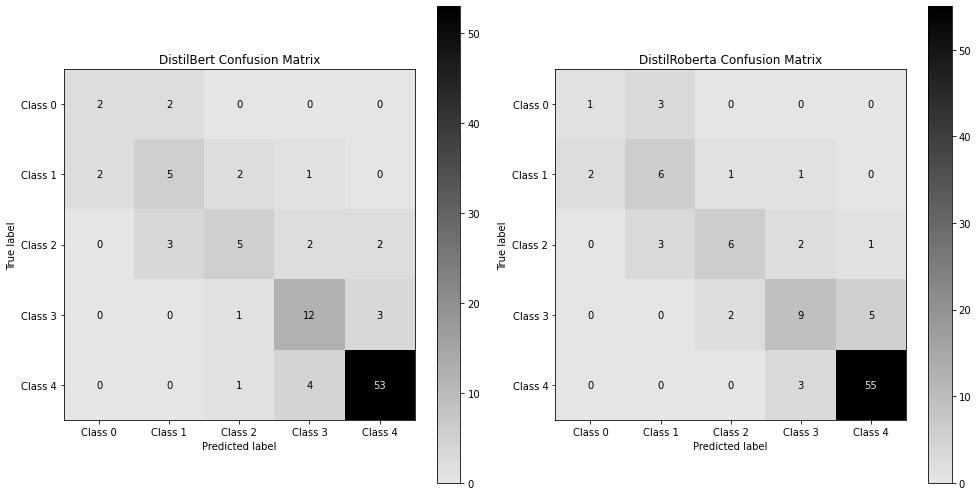

c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER FITZPATRICK TYPE-3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


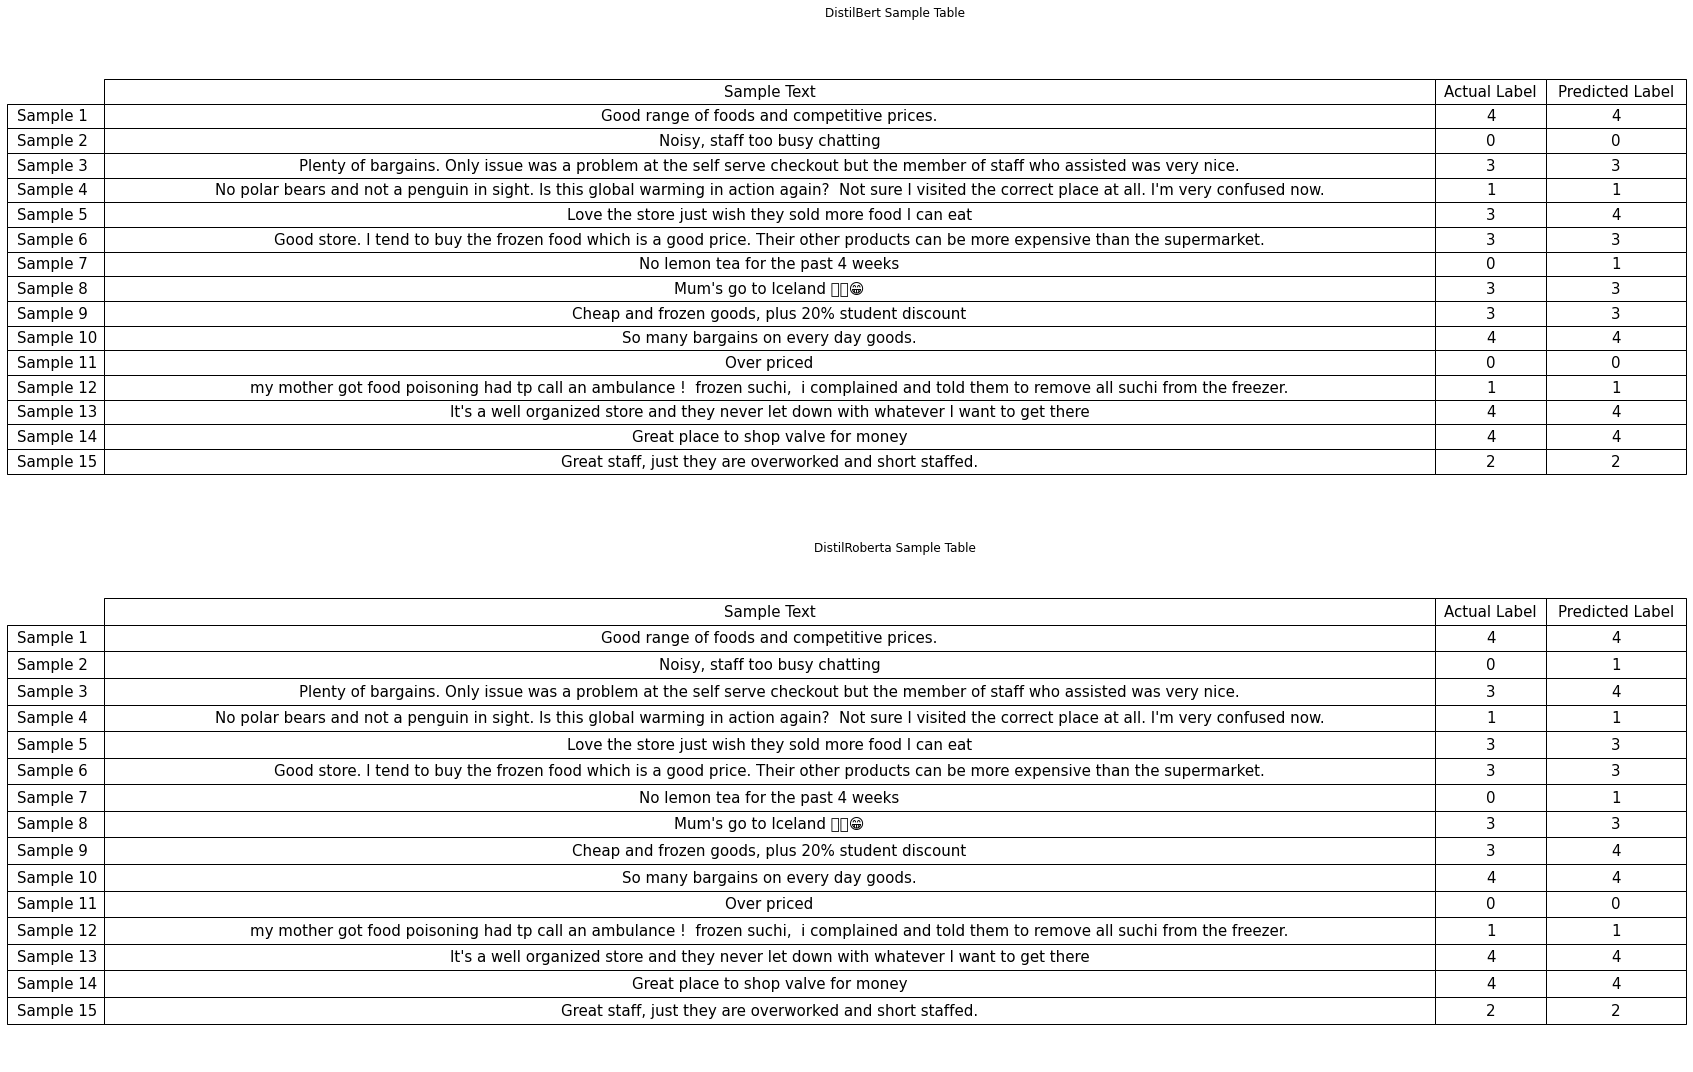

In [3]:
cache_dir_d_drive = "D:/models"
cache_dir_d_drive = "D:/models"
base_model = RobertaModel.from_pretrained('distilroberta-base', cache_dir=cache_dir_d_drive, num_labels = 5)
model_roberta = DistilRobertaForSentimentClassification(base_model, num_labels = 5)
model_roberta.load_state_dict(torch.load("../models/fine_tuned_distilroberta_base.pth"))
tokenizer_roberta = RobertaTokenizer.from_pretrained('distilroberta-base', cache_dir=cache_dir_d_drive)
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased', cache_dir=cache_dir_d_drive)
model = DistilBertForSequenceClassification.from_pretrained('../models/fine_tuned_distilbert', cache_dir=cache_dir_d_drive, num_labels = 5)
review_texts, labels = get_data()
review_texts_train, review_texts_test, labels_train, labels_test = train_test_split(review_texts, labels, test_size=0.2, random_state=42)

train_loader, val_loader = ProductReviewDataset.getDataLoader(review_texts_train, review_texts_test, labels_train, labels_test,tokenizer)
train_loader_roberta, val_loader_roberta = ProductReviewDataset.getDataLoader(review_texts_train, review_texts_test, labels_train, labels_test,tokenizer_roberta)
evaluator = Evaluator(model,val_loader,num_labels = 5)
evaluator.evaluate_model()
loss = evaluator.loss
mean_difference = evaluator.mean_difference

evaluator_roberta = Evaluator(model_roberta,val_loader_roberta,num_labels = 5)
evaluator_roberta.evaluate_model()
loss_bert = evaluator_roberta.loss
mean_difference_bert = evaluator_roberta.mean_difference
print(f"for DistilBert Mode : loss = {loss}", f"mean difference = {mean_difference}")
print(f"for DistilRoberta Mode : loss = {loss_bert}", f"mean difference = {mean_difference_bert}")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
evaluator.plot_confusion_matrix(ax = axes[0])
axes[0].set_title("DistilBert Confusion Matrix")
evaluator_roberta.plot_confusion_matrix(ax = axes[1])
axes[1].set_title("DistilRoberta Confusion Matrix")

plt.tight_layout()

fig2, axes2 = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))
num_samples = 15
sample_indices = random.sample(range(len(evaluator.all_actual_labels)), num_samples)

evaluator.display_sample_table(sample_indices, review_texts_test, ax=axes2[0])
axes2[0].set_title("DistilBert Sample Table")
evaluator_roberta.display_sample_table(sample_indices, review_texts_test, ax=axes2[1])
axes2[1].set_title("DistilRoberta Sample Table")

plt.tight_layout()

plt.show()
